In [ ]:
from google.colab import drive
drive.mount('/mnt/drive')

In [ ]:
!curl http://files.rpi4.lol/share?id=dd38803c-7861-4d59-a17e-180f4936b066 -o dataset.zip
!mkdir '/mnt/drive/MyDrive/VoiceVibe/'
!mkdir '/mnt/drive/MyDrive/VoiceVibe/Reports' '/mnt/drive/MyDrive/VoiceVibe/Models'

In [1]:
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
unzip = False
seed = 42
dataset_path = "/mnt/drive/MyDrive/VoiceVibe/datasets_1d/"

In [3]:
# unzip the dataset
if unzip:
    !unzip -q dataset.zip -d "/mnt/drive/MyDrive/VoiceVibe/"

In [4]:
df = pd.read_csv(os.path.join(dataset_path, "dataset_1d.csv"))

In [5]:
# Merge emotions fear and fearfull, calm and neutral

df['Emotion'] = df['Emotion'].replace('fearful', 'fear')
df['Emotion'] = df['Emotion'].replace('calm', 'neutral')

In [6]:
# Convert emotions to  one-hot encoding

emotions = df['Emotion'].unique()

for emotion in emotions:
    df[emotion] = np.where(df['Emotion'] == emotion, 1, 0)

# Drop emotion column
df = df.drop('Emotion', axis=1)

df.head()

,Intensity,AudioLength,MFCCExtra,angry,disgust,fear,happy,neutral,sad,surprised
0,unknown,2.275562,./output/datasets_v4/MFCCExtra/1001_DFA_ANG_XX...,1,0,0,0,0,0,0
1,unknown,2.335688,./output/datasets_v4/MFCCExtra/1001_DFA_DIS_XX...,0,1,0,0,0,0,0
2,unknown,2.168813,./output/datasets_v4/MFCCExtra/1001_DFA_FEA_XX...,0,0,1,0,0,0,0
3,unknown,1.868500,./output/datasets_v4/MFCCExtra/1001_DFA_HAP_XX...,0,0,0,1,0,0,0
4,unknown,2.035375,./output/datasets_v4/MFCCExtra/1001_DFA_NEU_XX...,0,0,0,0,1,0,0


In [7]:
# load np array from csv file
def load_np_array(filename):
    filename = filename.split('/')[-1]
    filepath = os.path.join(dataset_path, 'MFCCExtra', filename)
    abspath = os.path.abspath(filepath)
    return np.load(abspath)

# load dataset
array = np.array([load_np_array(filename) for filename in df['MFCCExtra']])

maximum = np.max(array)
minimum = np.min(array)

# normalize dataset
array = (array - minimum) / (maximum - minimum)

print(array.shape)

(48632, 182)


In [8]:
# split dataset

x_train, x_test, y_train, y_test = train_test_split(array, df[emotions], test_size=0.2, random_state=seed, shuffle=True, stratify=df[emotions])

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(38905, 182)
(9727, 182)
(38905, 7)
(9727, 7)


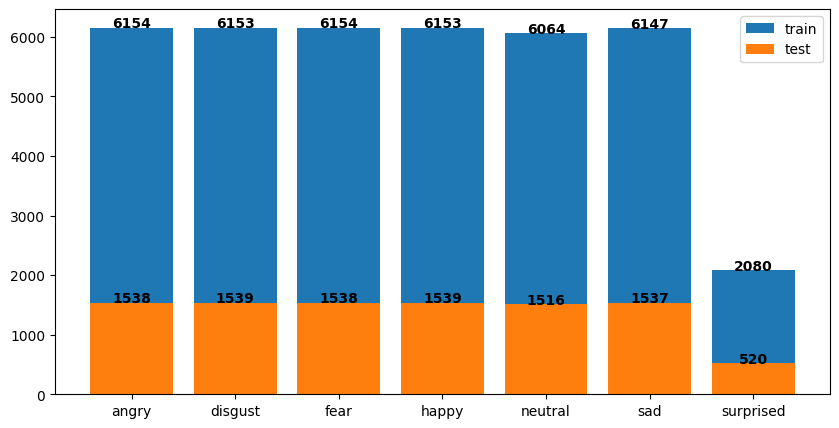

In [9]:
# plot train and test distribution of each emotion
train_distribution = y_train.sum(axis=0)
test_distribution = y_test.sum(axis=0)

plt.figure(figsize=(10, 5))
plt.bar(emotions, train_distribution, label='train')

for i, v in enumerate(train_distribution):
    plt.text(i, v, str(v), color='black', fontweight='bold', ha='center')


plt.bar(emotions, test_distribution, label='test')
for i, v in enumerate(test_distribution):
    plt.text(i, v, str(v), color='black', fontweight='bold', ha='center')

plt.legend()

plt.show()

In [10]:
# save dataset
np.save(os.path.join(dataset_path, 'x_train_1d.npy'), x_train)
np.save(os.path.join(dataset_path, 'x_test_1d.npy'), x_test)
np.save(os.path.join(dataset_path, 'y_train_1d.npy'), y_train)
np.save(os.path.join(dataset_path, 'y_test_1d.npy'), y_test)

# save classes
classes = pd.DataFrame(emotions, columns=['Emotion'])
np.savetxt(os.path.join(dataset_path, 'classes.txt'), classes.values, fmt='%s')